# TASKS 📒
[Link slides ultima aula](https://moodle.fundoamanha.com/pluginfile.php/684/mod_resource/content/1/Aula%20III.pptx.pdf)

[Link apresentação](https://docs.google.com/presentation/d/1zyHu0vrr0h-wBq8DgQfrgMuBiWZ1hR_g/edit?usp=sharing&ouid=115097960171013324541&rtpof=true&sd=true)
## Pré-processamento

### Coleta de dados

- [x]  Explicar escolha da fatia de tempo

### Limpeza de dados

- [ ]  Remover duplicatas
- [x]  Transformar tipos de dados
- [ ]  ○ variáveis fictícias (dummy)


## Análise Exploratória de Dados

### Estatísticas Descritivas
- [X]  Tendência central
- [X]  Medidas de dispersão

### Exame gráfico dos dados

- [x]  Univariado (distribuição, descritivos)
- [x]  Bivariado
- [x]  Multivariado

### Outras análises

- [x]  Dados ausentes
- [ ]  Outliers
- [ ]  Suposições para técnicas analíticas

# Pré-processamento

Para a coleta de dados, foi utilizado a fonte fornecida pela empresa EVCOMX, de hidrotelemetria. Foi escolhido o periodo de tempo de maio a agosto (3 meses), pois engobla o evento das enchentes que aconteceram no Rio Grande do Sul.

Site fonte: https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

Os dados consistem em informações hídricas das bacias das cidades gaúchas de Muçum, Santa Tereza e Encantado.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('MUÇUM maio-ago.csv', encoding='latin-1', delimiter=';', thousands=',')
df = df.drop('Unnamed: 5', axis='columns')
df2 = pd.read_csv('SANTA TEREZA maio-ago.csv', encoding='latin-1', delimiter=';', thousands=',')
df2 = df2.drop('Unnamed: 5', axis='columns')
df3 = pd.read_csv('ENCANTADO maio-ago.csv', encoding='latin-1', delimiter=';', thousands=',')
df3 = df3.drop('Unnamed: 5', axis='columns')


**Juntando as colunas de data e hora, convertendo para datetime**

In [ ]:
df['data_hora'] = df['Data'] + df['Hora']
df['data_hora'] = pd.to_datetime(df['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df = df.drop('Data', axis='columns')
df = df.drop('Hora', axis='columns')

df2['data_hora'] = df2['Data'] + df2['Hora']
df2['data_hora'] = pd.to_datetime(df2['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df2 = df2.drop('Data', axis='columns')
df2 = df2.drop('Hora', axis='columns')

df3['data_hora'] = df3['Data'] + df3['Hora']
df3['data_hora'] = pd.to_datetime(df3['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df3 = df3.drop('Data', axis='columns')
df3 = df3.drop('Hora', axis='columns')



In [ ]:
# Ajusta ordem das colunas para data ficar por primeiro
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]

cols = df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
df3 = df3[cols]

**Transformando numeros em inteiros**

In [ ]:
# Transforma tipo das colunas (timeseries) para inteiros
df['Nível (cm)'] = pd.to_numeric(df['Nível (cm)'], errors='coerce')
df['Chuva (mm)'] = pd.to_numeric(df['Chuva (mm)'], errors='coerce')

df2['Nível (cm)'] = pd.to_numeric(df2['Nível (cm)'], errors='coerce')
df2['Chuva (mm)'] = pd.to_numeric(df2['Chuva (mm)'], errors='coerce')

df3['Nível (cm)'] = pd.to_numeric(df3['Nível (cm)'], errors='coerce')
df3['Chuva (mm)'] = pd.to_numeric(df3['Chuva (mm)'], errors='coerce')


**Renomeando colunas**

In [ ]:
colunas_alternativas = ['Data_Hora', 'Chuva', 'Nivel', 'Vazao']
df.columns = colunas_alternativas

df2.columns = colunas_alternativas
df2 = df2.drop('Vazao', axis = 'columns') #tudo está nulo

df3.columns = colunas_alternativas


# Análise Exploratória de Dados

## Estatísticas Descritivas

### Medidas de Tendência Central:

In [ ]:
# Média:
media_chuva = df['Chuva'].mean()
media_nivel = df['Nivel'].mean()
media_vazao = df['Vazao'].mean()

# Média:
media_chuva2 = df2['Chuva'].mean()
media_nivel2= df2['Nivel'].mean()
#media_vazao2 = df2['Vazao'].mean()

# Média:
media_chuva3 = df3['Chuva'].mean()
media_nivel3 = df3['Nivel'].mean()
media_vazao3 = df3['Vazao'].mean()

print(f'A média da chuva em Muçum nos meses de maio até agosto foi de {media_chuva:.2f} mm, a média do nível do rio foi de {media_nivel:.2f} cm e a média da vazão do rio foi de {media_vazao:.2f} m3/2')
print(f'A média da chuva em Santa Tereza nos meses de maio até agosto foi de {media_chuva2:.2f} mm, a média do nível do rio foi de {media_nivel2:.2f} cm e a média da vazão do rio foi de - m3/2')
print(f'A média da chuva em Encantado nos meses de maio até agosto foi de {media_chuva3:.2f} mm, a média do nível do rio foi de {media_nivel3:.2f} cm e a média da vazão do rio foi de {media_vazao3:.2f} m3/2')

A média da chuva em Muçum nos meses de maio até agosto foi de 0.13 mm, a média do nível do rio foi de 582.91 cm e a média da vazão do rio foi de 1743.51 m3/2
A média da chuva em Santa Tereza nos meses de maio até agosto foi de 0.13 mm, a média do nível do rio foi de 574.22 cm e a média da vazão do rio foi de - m3/2
A média da chuva em Encantado nos meses de maio até agosto foi de 0.11 mm, a média do nível do rio foi de 326.11 cm e a média da vazão do rio foi de 921.85 m3/2


In [ ]:
# Mediana
mediana_chuva = df['Chuva'].median()
mediana_nivel = df['Nivel'].median()
mediana_vazao = df['Vazao'].median()

mediana_chuva2 = df2['Chuva'].median()
mediana_nivel2 = df2['Nivel'].median()
#mediana_vazao2 = df2['Vazao'].median()

mediana_chuva3 = df3['Chuva'].median()
mediana_nivel3 = df3['Nivel'].median()
mediana_vazao3 = df3['Vazao'].median()

print(f'A mediana da chuva em Muçum nos meses de maio até agosto foi de {mediana_chuva:.2f} mm, a mediana do nível do rio foi de {mediana_nivel:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao:.2f} m3/2')
print(f'A mediana da chuva em Santa Tereza nos meses de maio até agosto foi de {mediana_chuva2:.2f} mm, a mediana do nível do rio foi de {mediana_nivel2:.2f} cm e a mediana da vazão do rio foi de - m3/2')
print(f'A mediana da chuva em Encantado nos meses de maio até agosto foi de {mediana_chuva3:.2f} mm, a mediana do nível do rio foi de {mediana_nivel3:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao3:.2f} m3/2')

A mediana da chuva em Muçum nos meses de maio até agosto foi de 0.00 mm, a mediana do nível do rio foi de 450.00 cm e a mediana da vazão do rio foi de 993.17 m3/2
A mediana da chuva em Santa Tereza nos meses de maio até agosto foi de 0.00 mm, a mediana do nível do rio foi de 456.00 cm e a mediana da vazão do rio foi de - m3/2
A mediana da chuva em Encantado nos meses de maio até agosto foi de 0.00 mm, a mediana do nível do rio foi de 236.00 cm e a mediana da vazão do rio foi de 190.84 m3/2


### Medidas de Dispersão:

In [ ]:
# Variância:
variancia_chuva = df['Chuva'].var()
variancia_nivel = df['Nivel'].var()
variancia_vazao = df['Vazao'].var()

variancia_chuva2 = df2['Chuva'].var()
variancia_nivel2 = df2['Nivel'].var()
#variancia_vazao2 = df2['Vazao'].var()

variancia_chuva3 = df3['Chuva'].var()
variancia_nivel3 = df3['Nivel'].var()
variancia_vazao3 = df3['Vazao'].var()

print(f'A variância da chuva em Muçum nos meses de maio até agosto foi de {variancia_chuva:.2f} mm, a variância do nível do rio foi de {variancia_nivel:.2f} cm e a variância da vazão do rio foi de {variancia_vazao:.2f} m3/2')
print(f'A variância da chuva em Santa Tereza nos meses de maio até agosto foi de {variancia_chuva2:.2f} mm, a variância do nível do rio foi de {variancia_nivel2:.2f} cm e a variância da vazão do rio foi de - m3/2')
print(f'A variância da chuva em Encantado nos meses de maio até agosto foi de {variancia_chuva3:.2f} mm, a variância do nível do rio foi de {variancia_nivel3:.2f} cm e a variância da vazão do rio foi de {variancia_vazao3:.2f} m3/2')

A variância da chuva em Muçum nos meses de maio até agosto foi de 0.52 mm, a variância do nível do rio foi de 190909.69 cm e a variância da vazão do rio foi de 4989206.08 m3/2
A variância da chuva em Santa Tereza nos meses de maio até agosto foi de 0.47 mm, a variância do nível do rio foi de 143752.76 cm e a variância da vazão do rio foi de - m3/2
A variância da chuva em Encantado nos meses de maio até agosto foi de 0.30 mm, a variância do nível do rio foi de 34636.86 cm e a variância da vazão do rio foi de 3228346.33 m3/2


In [ ]:
# Desvio Padrão:
desvio_chuva = df['Chuva'].std()
desvio_nivel = df['Nivel'].std()
desvio_vazao = df['Vazao'].std()

desvio_chuva2 = df2['Chuva'].std()
desvio_nivel2 = df2['Nivel'].std()
#desvio_vazao2 = df2['Vazao'].std()

desvio_chuva3 = df3['Chuva'].std()
desvio_nivel3 = df3['Nivel'].std()
desvio_vazao3 = df3['Vazao'].std()

print(f'O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de {desvio_chuva:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao:.2f} m3/2')
print(f'O desvio padrão da chuva em Santa Tereza nos meses de maio até agosto foi de {desvio_chuva2:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel2:.2f} cm e o desvio padrão da vazão do rio foi de - m3/2')
print(f'O desvio padrão da chuva em Encantado nos meses de maio até agosto foi de {desvio_chuva3:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel3:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao3:.2f} m3/2')

O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de 0.72 mm, o desvio padrão do nível do rio foi de 436.93 cm e o desvio padrão da vazão do rio foi de 2233.65 m3/2
O desvio padrão da chuva em Santa Tereza nos meses de maio até agosto foi de 0.69 mm, o desvio padrão do nível do rio foi de 379.15 cm e o desvio padrão da vazão do rio foi de - m3/2
O desvio padrão da chuva em Encantado nos meses de maio até agosto foi de 0.55 mm, o desvio padrão do nível do rio foi de 186.11 cm e o desvio padrão da vazão do rio foi de 1796.76 m3/2


*texto em itálico*## Exame Gráfico dos Dados

### Univariado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

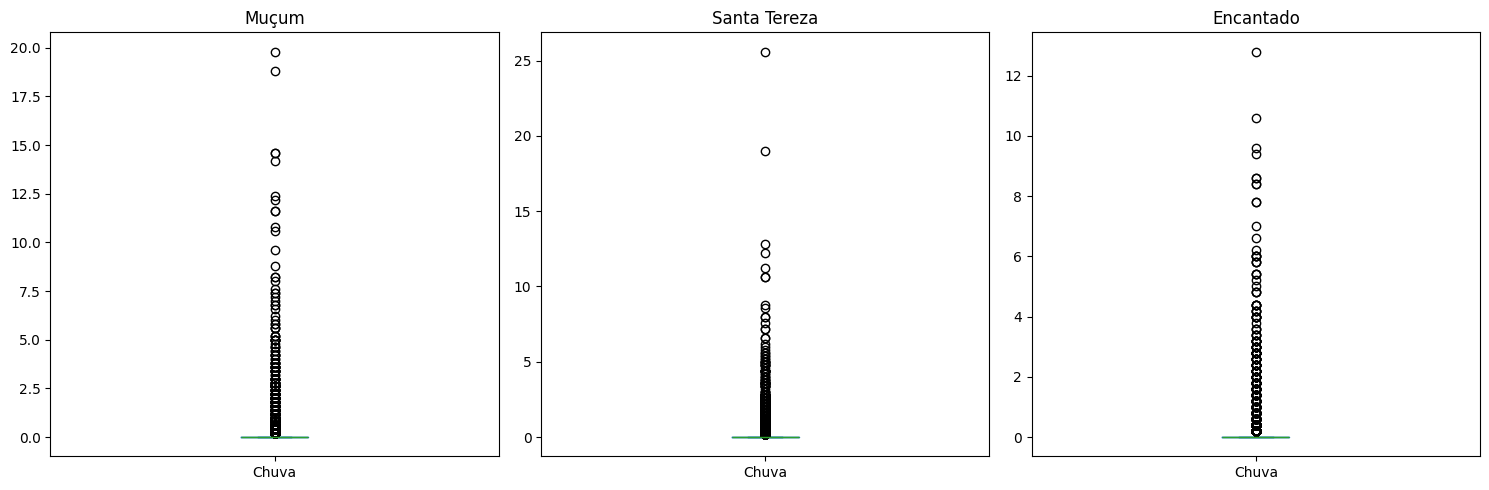

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df['Chuva'].plot(kind='box', ax=axes[0])
axes[0].set_title('Muçum')

df2['Chuva'].plot(kind='box', ax=axes[1])
axes[1].set_title('Santa Tereza')

df3['Chuva'].plot(kind='box', ax=axes[2])
axes[2].set_title('Encantado')

plt.tight_layout()
plt.show()

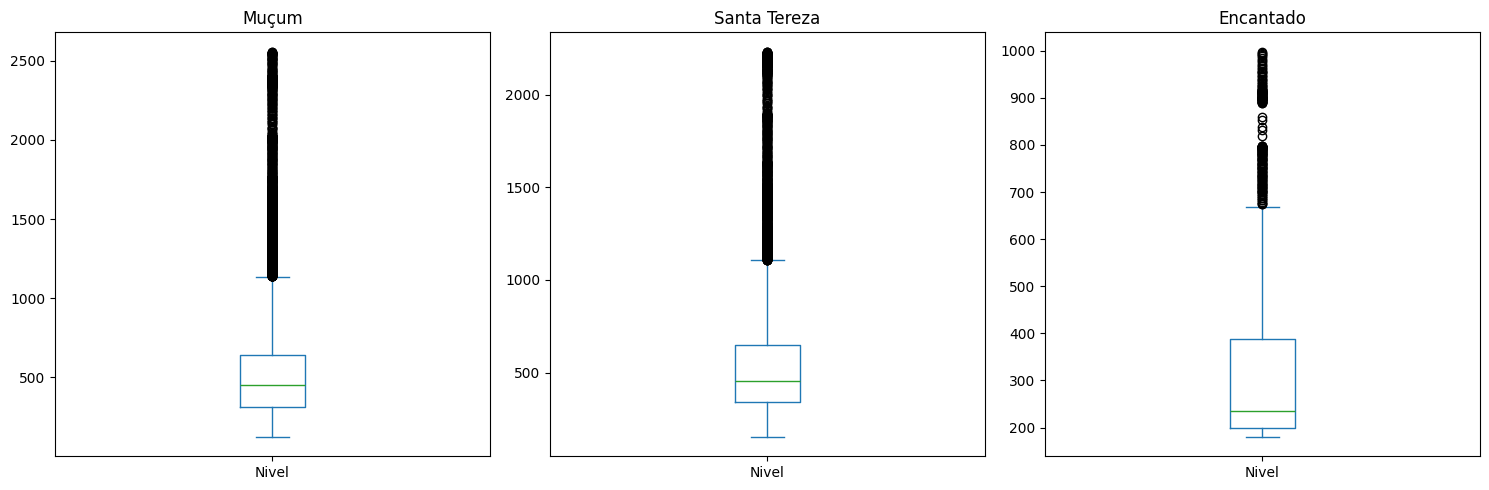

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df['Nivel'].plot(kind='box', ax=axes[0])
axes[0].set_title('Muçum')

df2['Nivel'].plot(kind='box', ax=axes[1])
axes[1].set_title('Santa Tereza')

df3['Nivel'].plot(kind='box', ax=axes[2])
axes[2].set_title('Encantado')

plt.tight_layout()
plt.show()

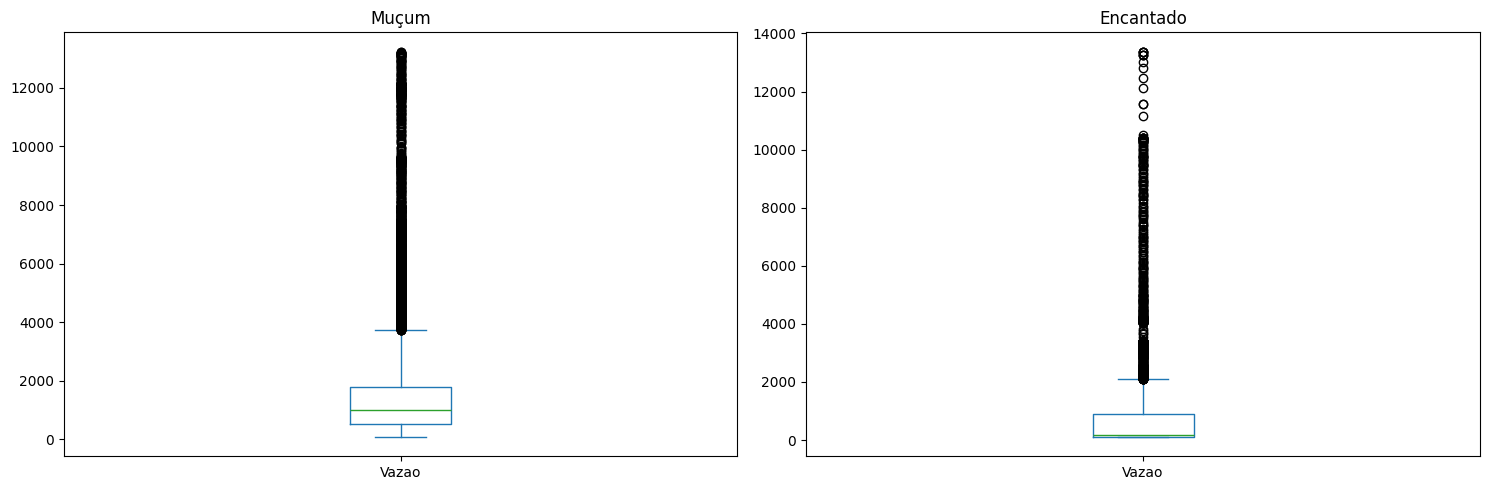

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['Vazao'].plot(kind='box', ax=axes[0])
axes[0].set_title('Muçum')

df3['Vazao'].plot(kind='box', ax=axes[1])
axes[1].set_title('Encantado')

plt.tight_layout()
plt.show()

### Bivariado

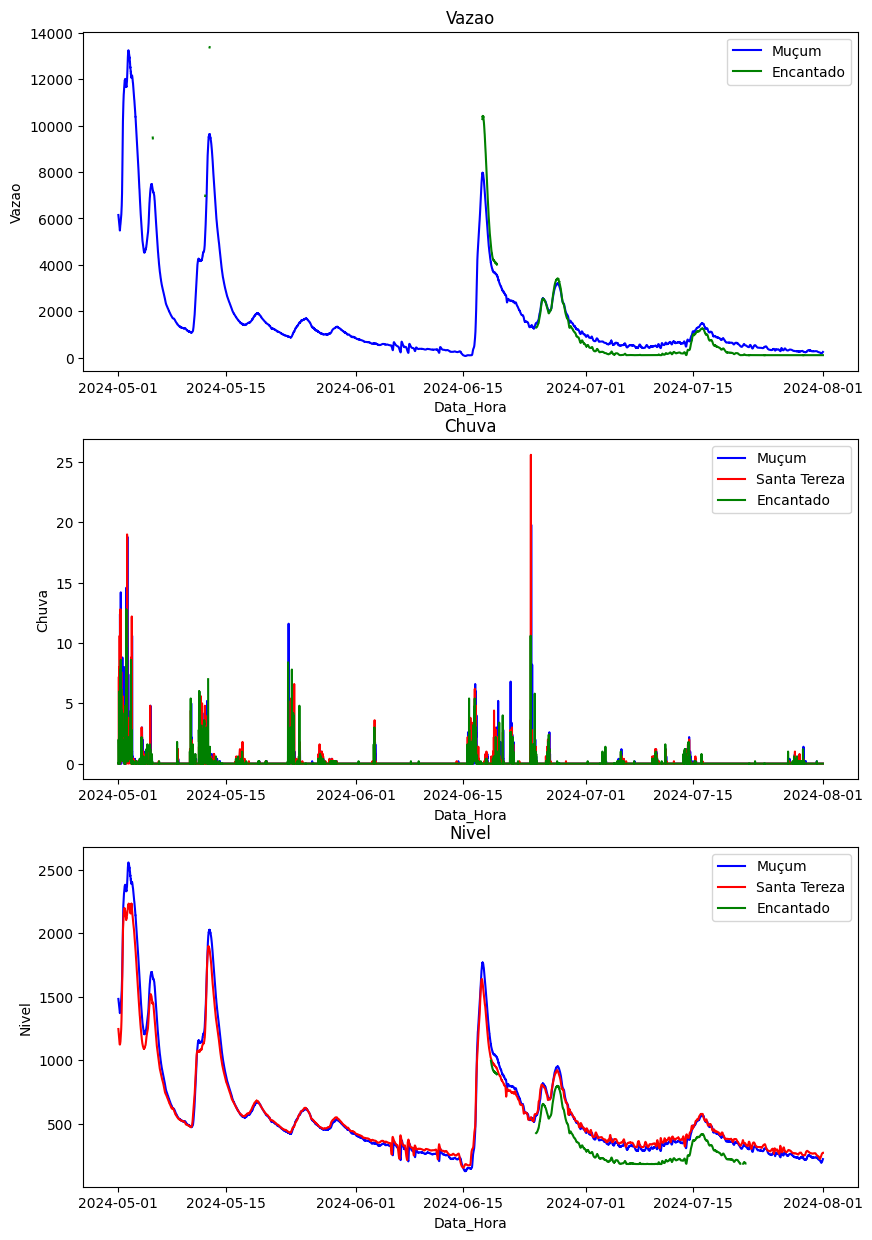

In [ ]:
# Create the subplots in a single row
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

# Plot each timeseries
axs[0].plot(df['Data_Hora'], df['Vazao'], color='blue')
axs[0].plot(df3['Data_Hora'], df3['Vazao'], color='green')
axs[0].set_title('Vazao')
axs[0].set_xlabel('Data_Hora')
axs[0].set_ylabel('Vazao')
axs[0].legend(['Muçum', 'Encantado'])

axs[1].plot(df['Data_Hora'], df['Chuva'], color='blue')
axs[1].plot(df2['Data_Hora'], df2['Chuva'], color='red')
axs[1].plot(df3['Data_Hora'], df3['Chuva'], color='green')
axs[1].set_title('Chuva')
axs[1].set_xlabel('Data_Hora')
axs[1].set_ylabel('Chuva')
axs[1].legend(['Muçum', 'Santa Tereza', 'Encantado'])

axs[2].plot(df['Data_Hora'], df['Nivel'], color='blue')
axs[2].plot(df2['Data_Hora'], df2['Nivel'], color='red')
axs[2].plot(df3['Data_Hora'], df3['Nivel'], color='green')
axs[2].set_title('Nivel')
axs[2].set_xlabel('Data_Hora')
axs[2].set_ylabel('Nivel')
axs[2].legend(['Muçum', 'Santa Tereza', 'Encantado'])

# Adjust layout and show plot

plt.show()

### Multivariado

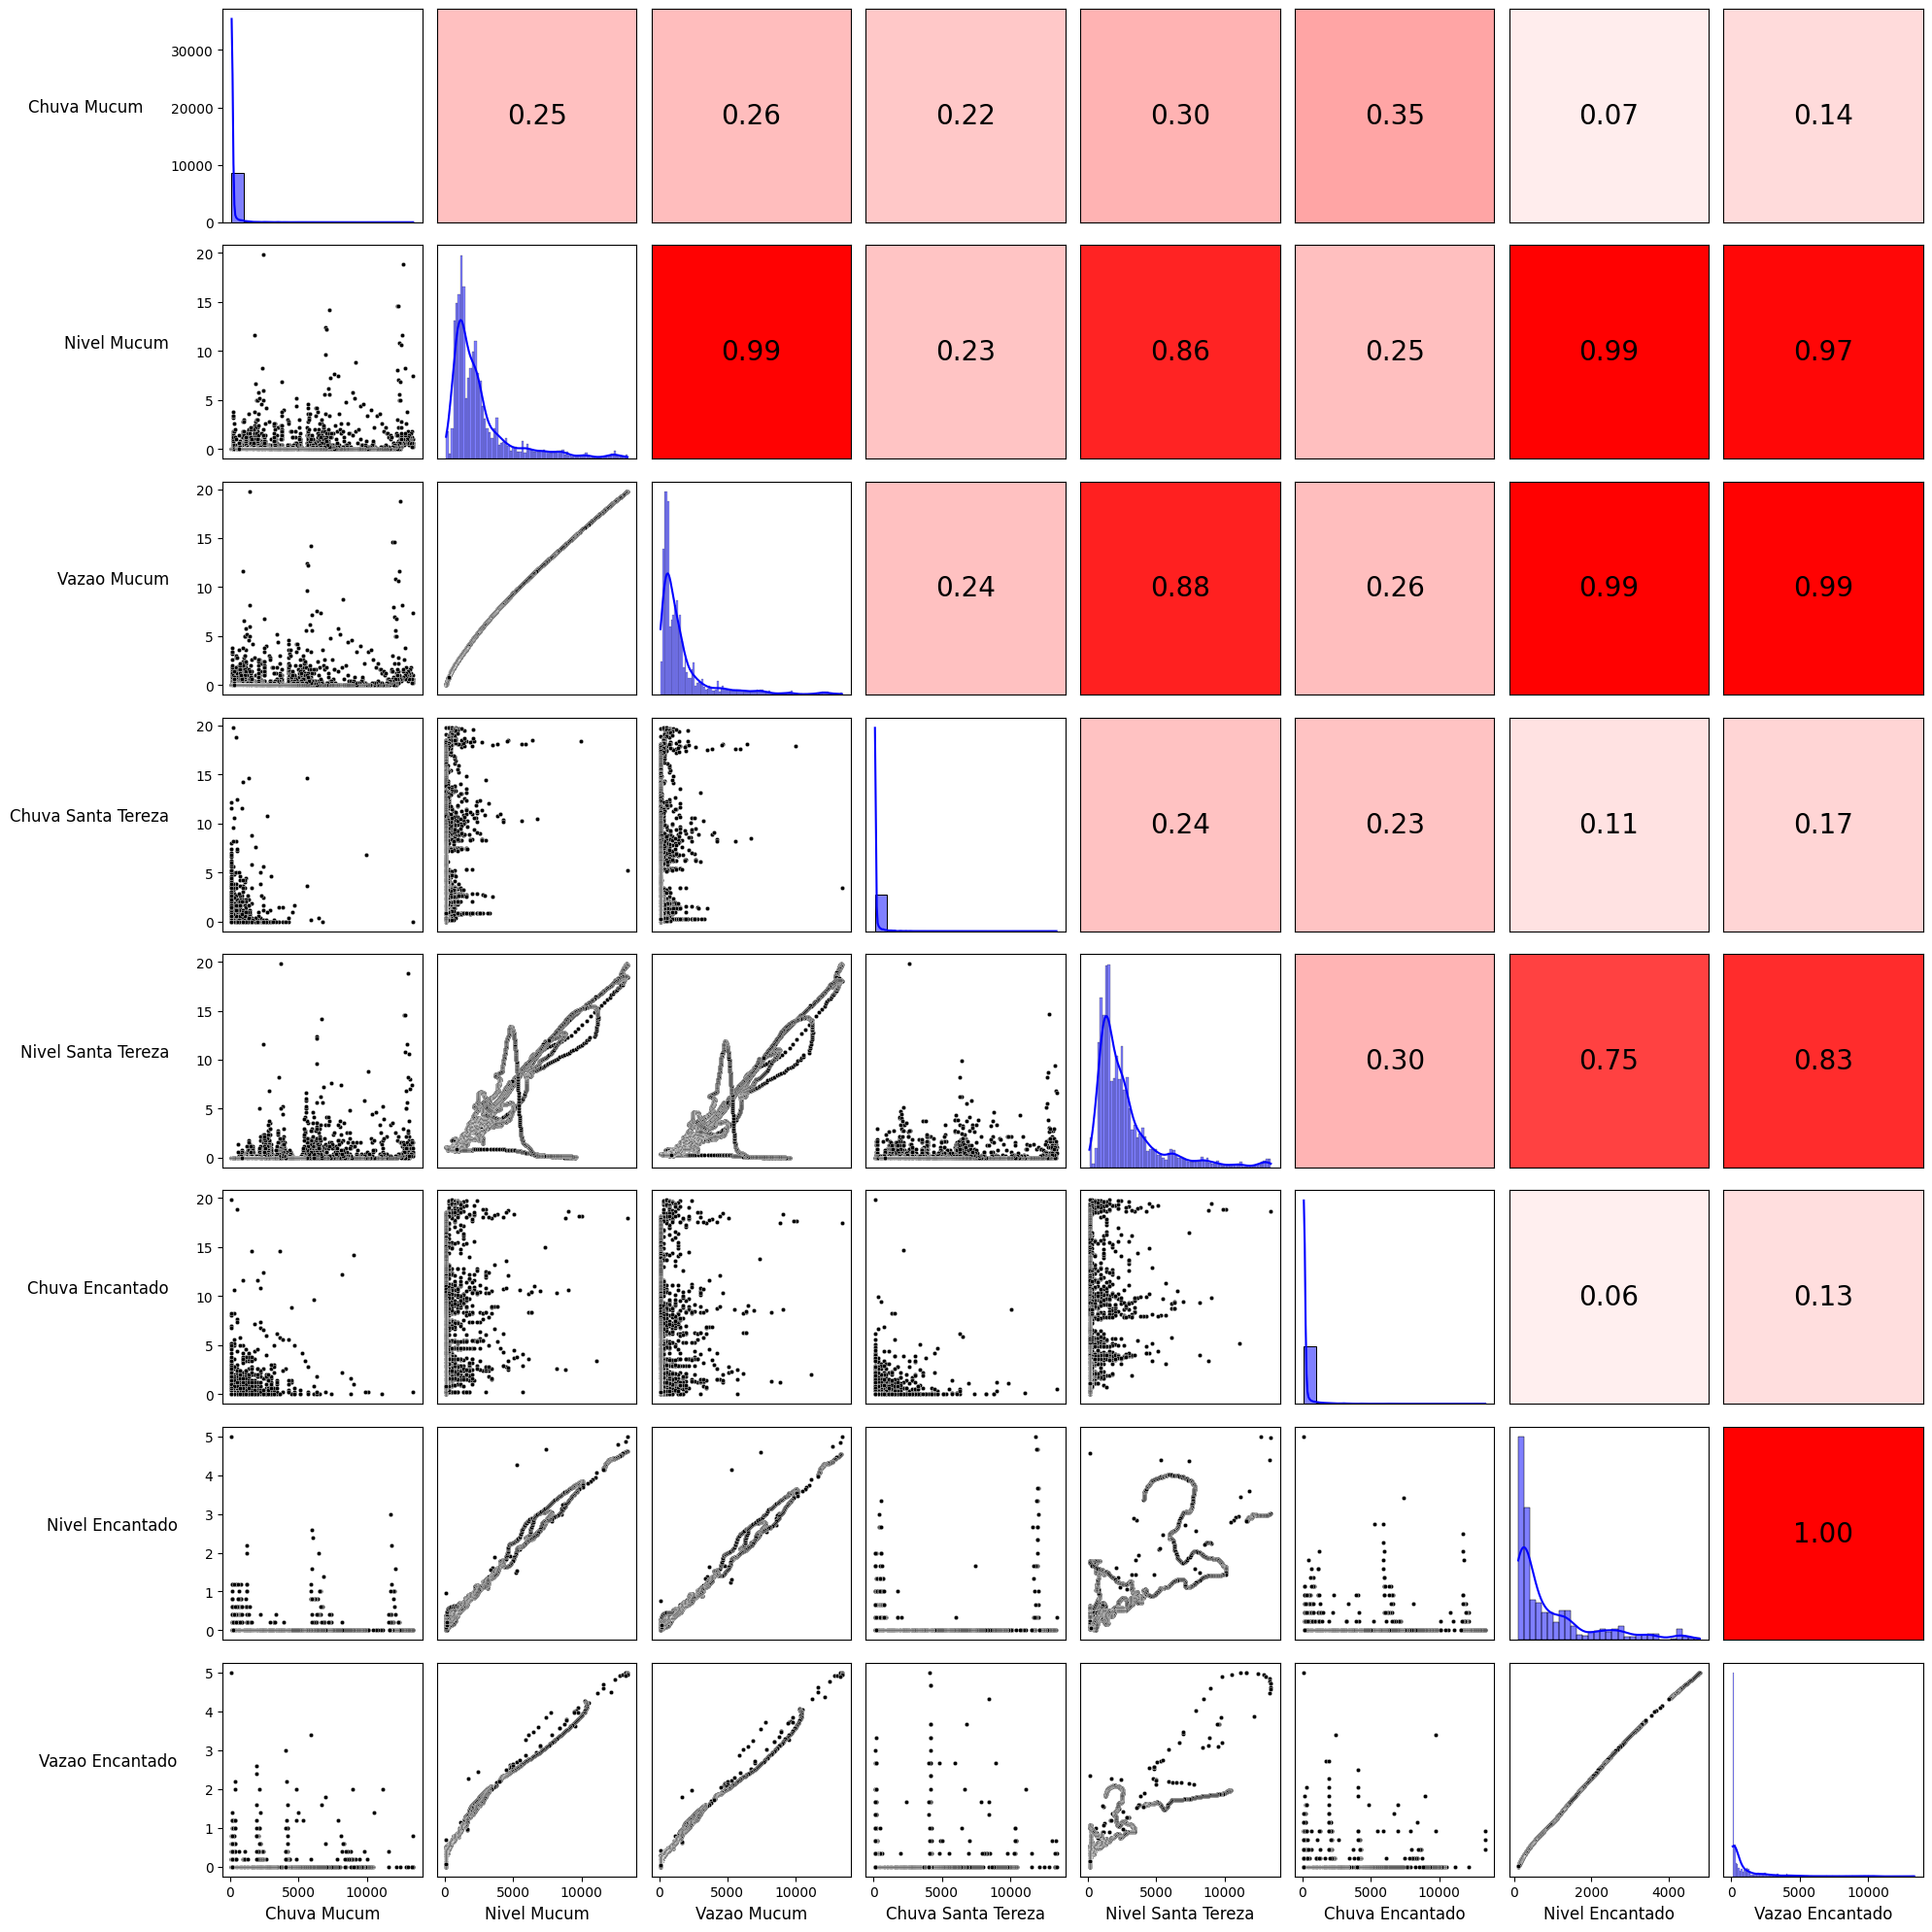

In [ ]:
import seaborn as sns

df.columns = ['Data_Hora Mucum', 'Chuva Mucum', 'Nivel Mucum', 'Vazao Mucum']
df2.columns = ['Data_Hora Santa Tereza', 'Chuva Santa Tereza', 'Nivel Santa Tereza']
df3.columns = ['Data_Hora Encantado', 'Chuva Encantado', 'Nivel Encantado', 'Vazao Encantado']

df=df.drop('Data_Hora Mucum', axis='columns')
df2=df2.drop('Data_Hora Santa Tereza', axis='columns')
df3=df3.drop('Data_Hora Encantado', axis='columns')

df_combinado = pd.concat([df, df2, df3], axis=1)

fig, axes = plt.subplots(len(df_combinado.columns), len(df_combinado.columns), figsize=(20, 20))


for i, col1 in enumerate(df_combinado.columns):
    for j, col2 in enumerate(df_combinado.columns):
        ax = axes[i, j]
        if i == j:
            #remove legenda duplicada, gera histogramas
            sns.histplot(df_combinado[col1], kde=True, ax=ax, color = "blue")
            ax.set_xlabel('')
            ax.set_ylabel('')
        elif i < j:
            #mostra correlação em número
            corr = df_combinado[col1].corr(df_combinado[col2])
            vermelho= abs(corr)
            ax.set_facecolor((1, 1- vermelho, 1 - vermelho))
            ax.text(0.5, 0.5, f"{corr:.2f}", ha='center', va='center', fontsize=20, color="black")
        else:
            #mostra correlação em scatterplot
            sns.scatterplot(x=df_combinado[col1], y=df_combinado[col2], ax=ax, s=10, color = "black")
            ax.set_xlabel('')
            ax.set_ylabel('')

        if i < len(df_combinado.columns) - 1:
            ax.set_xticks([])
        if j > 0:
            ax.set_yticks([])

        if j == 0:
            ax.set_ylabel(col1, fontsize=12, rotation=0, labelpad=20, ha='right')
        if i == len(df_combinado.columns) - 1:
            ax.set_xlabel(col2, fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.show()


## Outras análises

In [ ]:
# Quantidade de dados nulos no Data Frame
print('Quantidade de dados nulos em Muçum: ', df.isna().sum())

Quantidade de dados nulos em Muçum:  Data_Hora    0
Chuva        4
Nivel        0
Vazao        0
dtype: int64


In [ ]:
print('Quantidade de dados nulos em Santa Tereza: ', df2.isna().sum())

Quantidade de dados nulos em Santa Tereza:  Data_Hora       0
Chuva           0
Nivel           0
Vazao        8621
dtype: int64


In [ ]:
print('Quantidade de dados nulos em Encantado: ', df3.isna().sum())

Quantidade de dados nulos em Encantado:  Data_Hora       0
Chuva          36
Nivel        6136
Vazao        4980
dtype: int64
